In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-testing-dataset/test_group.csv
/kaggle/input/ab-testing-dataset/control_group.csv


In [2]:
control = pd.read_csv('/kaggle/input/ab-testing-dataset/control_group.csv', sep = ';')
control

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [3]:
control.shape

(30, 10)

In [4]:
test = pd.read_csv('/kaggle/input/ab-testing-dataset/test_group.csv', sep = ';')
test

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


Combining 2 dataframes test and control

In [5]:
data = pd.concat([control,test]).reset_index(drop = True)
data

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [6]:
data.columns = ['campaign_name','date','spend_usd','no_impressions','reach','no_website_clicks','no_searches','no_viewed_content','no_add_cart','no_purchases']
data.columns

Index(['campaign_name', 'date', 'spend_usd', 'no_impressions', 'reach',
       'no_website_clicks', 'no_searches', 'no_viewed_content', 'no_add_cart',
       'no_purchases'],
      dtype='object')

In [7]:
data.isna().sum()

campaign_name        0
date                 0
spend_usd            0
no_impressions       1
reach                1
no_website_clicks    1
no_searches          1
no_viewed_content    1
no_add_cart          1
no_purchases         1
dtype: int64

In [8]:
for col in ['no_impressions','reach','no_website_clicks','no_searches','no_viewed_content','no_add_cart','no_purchases']:
    data[col].fillna(value=data[col].mean(),inplace=True)

/tmp/ipykernel_30/106145523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(value=data[col].mean(),inplace=True)


In [9]:
data.groupby("campaign_name").agg({"no_purchases":"mean","no_impressions":"mean","no_website_clicks":"mean","no_viewed_content":"mean","no_add_cart":"mean"})

,no_purchases,no_impressions,no_website_clicks,no_viewed_content,no_add_cart
campaign_name,,,,,
Control Campaign,522.766667,108966.962712,5332.853107,1942.338983,1292.907345
Test Campaign,521.233333,74584.800000,6032.333333,1858.000000,881.533333


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

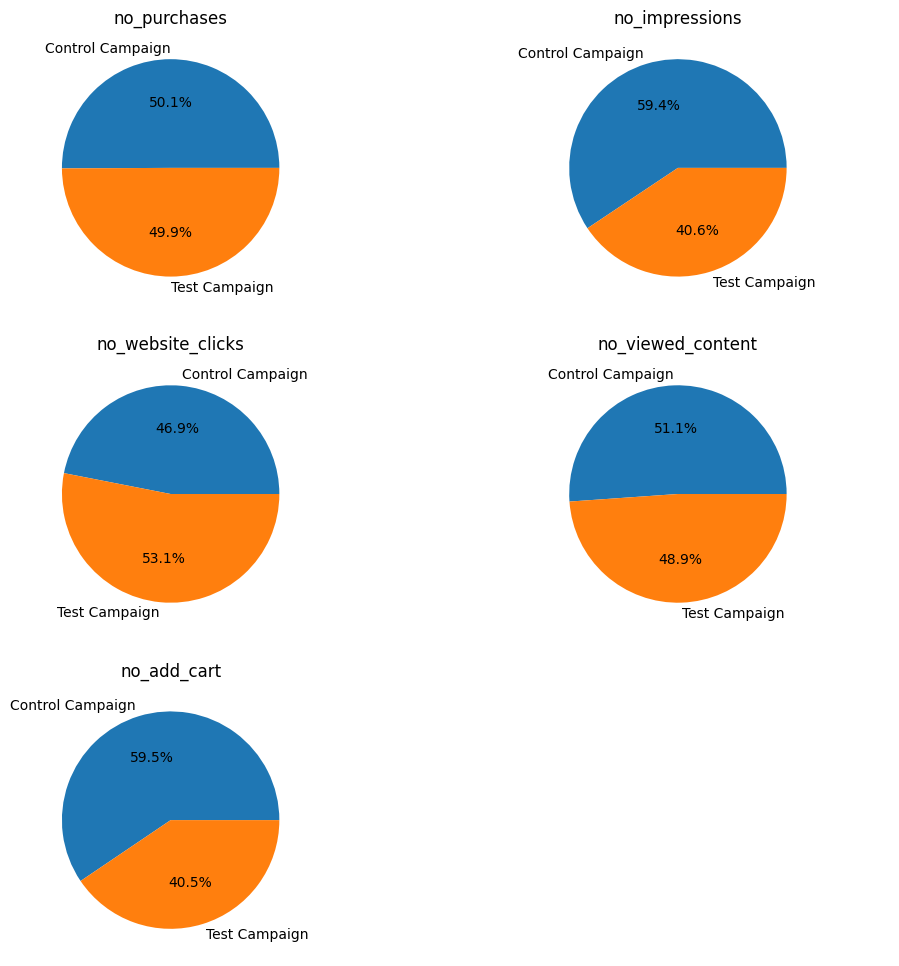

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
for i, col in enumerate(['no_purchases', 'no_impressions', 'no_website_clicks', 'no_viewed_content','no_add_cart']):
    means = data.groupby('campaign_name')[col].mean()
    axes[i].pie(means.values, labels = means.index, autopct = '%1.1f%%')
    axes[i].set_title(col)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.show()

In [12]:
from scipy.stats import shapiro

Checking for the normality assumption, using the Shapiro Wilk's test<br>
Null hypothesis: Data(number of purchases) is normally distributed\
Alternative hypothesis: Data(number of purchases) is not normally distributed.<br>
For checking the normality of the data we will use the shapiro wilk test and we want to check this for both groups of data: control and test group

In [13]:
test_stat, pvalue = shapiro(data.loc[data["campaign_name"]=="Control Campaign","no_purchases"])
print("Test Statistic:", test_stat)
print("p value:", pvalue)

Test Statistic: 0.9432366874765001
p value: 0.11119249276588161


In [14]:
test_stat, pvalue = shapiro(data.loc[data["campaign_name"]=="Test Campaign","no_purchases"])
print("Test Statistic:", test_stat)
print("p value:", pvalue)

Test Statistic: 0.9181893816994644
p value: 0.02407767129664654


Since the p value is > 0.05 for control group, the data does follow normal distribution.
P value is <0.05 for test group, the data doesn't follow normal distribution

Since one of the group doesn't follow normal distribution, its safer to use non- paramteric test like mann - whiteny u test for further analysis. Otherwise you can use t-tests.

In [16]:
#Learn about Man - whiteny u test
from scipy.stats import mannwhitneyu

In [21]:
stat, pvalue = mannwhitneyu(x = data.loc[data["campaign_name"]=="Control Campaign","no_purchases"],
                           y = data.loc[data["campaign_name"]=="Test Campaign","no_purchases"]
                           )
print(pvalue)

0.9469515266277105


Null Hypothesis: There is no significant difference between the control group and the test group\
Alternate Hypothesis: There is a significant difference between the control group and the test group\
Since p value > 0.05, we fail to reject the null hypothesis and conclude that there is no significant difference between the control and test groups with respect to number of purchases
